In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pickle

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ari
[nltk_data]     Widyatama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [84]:
with open('datasets/greeting.json') as file:
    dataGreet = json.load(file)

with open('datasets/medical-relatedID.json') as file:
    dataMed = json.load(file)

In [85]:
patterns = []
tags = []
responses = {}

for intent in dataMed['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

for intent in dataGreet['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

print(len(patterns))
print(len(responses))
print(len(tags))
print(patterns[9:])
print(tags[0:9])
print(responses)

263
59
263
['Obat apa yang harus digunakan untuk luka lecet?', 'Bagaimana cara menyembuhkan lecet?', 'Bagaimana Anda mengobati Sting?', 'Sengatan', 'Apa yang harus dilakukan jika Anda tersengat?', 'Obat apa yang digunakan jika tersengat?', 'Cara menghilangkan serpihan', 'Bagaimana cara menyembuhkan serpihan?', 'Apa yang harus saya lakukan bila saya terkena serpihan?', 'Bagaimana cara Anda membawa serpihan ke permukaan?', 'Bagaimana cara mengobati terkilir?', 'apa yang harus saya lakukan jika saya terkilir?', 'Krim apa yang harus digunakan jika saya terkilir?', 'Obat apa yang harus digunakan jika saya terkilir?', 'Bagaimana cara mengobati ketegangan?', 'apa yang harus saya lakukan jika saya terserang strain?', 'Krim apa yang harus digunakan jika saya terserang tegang otot?', 'Obat apa yang harus saya gunakan jika saya terserang strain?', 'Bagaimana Anda mendiagnosis suatu strain?', 'Apakah panas atau es lebih baik untuk otot yang tertarik?', 'Bagaimana cara mengobati demam ringan?', 'ap

In [86]:
SteamPattterns = []

for pattern in patterns:
    stemming = stemmer.stem(pattern)
    SteamPattterns.append(stemming)


In [87]:
print(len(SteamPattterns))
print(len(responses))
print(len(tags))
print(SteamPattterns[0:9])
print(tags[0:9])

263
59
263
['apa yang harus laku jika potong', 'bagaimana cara sembuh luka', 'obat apa yang harus pakai untuk luka', 'apa yang harus aplikasi pada luka', 'potong', 'bagaimana cara obat lecet', 'apakah abrasi timbul bekas luka', 'lecet', 'apa yang harus laku jika jadi lecet']
['Potongan', 'Potongan', 'Potongan', 'Potongan', 'Potongan', 'Lecet', 'Lecet', 'Lecet', 'Lecet']


In [88]:
pickle.dump(tags,open('./model/tags.pkl','wb'))
pickle.dump(responses,open('./model/responses.pkl','wb'))
pickle.dump(SteamPattterns,open('./model/patterns.pkl','wb'))

In [89]:
def splitDataset(inputs, labels):
    totalData = len(inputs)
    valSize = int(totalData * 0.2)
    valSplit = list(range(0, valSize * 5, 5))
    trainSplit = [i for i in range(totalData) if i not in valSplit]


    trainTexts = [inputs[i] for i in trainSplit]
    valTexts = [inputs[i] for i in valSplit]
    trainLabels = [labels[i] for i in trainSplit]
    valLabels = [labels[i] for i in valSplit]

    trainDataset = tf.data.Dataset.from_tensor_slices((trainTexts, trainLabels))
    valDataset = tf.data.Dataset.from_tensor_slices((valTexts, valLabels))

    return trainDataset, valDataset

In [90]:
trainDataset, valDataset = splitDataset(SteamPattterns, tags)

print(f"There are {trainDataset.cardinality()} sentence-label pairs for training.\n")
print(f"There are {valDataset.cardinality()} sentence-label pairs for validation.\n")

print(trainDataset)
print(valDataset)

There are 211 sentence-label pairs for training.

There are 52 sentence-label pairs for validation.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [91]:
for data in trainDataset.take(10).as_numpy_iterator():
    print(data)

for data in valDataset.take(5).as_numpy_iterator():
    print(data)

(b'bagaimana cara sembuh luka', b'Potongan')
(b'obat apa yang harus pakai untuk luka', b'Potongan')
(b'apa yang harus aplikasi pada luka', b'Potongan')
(b'potong', b'Potongan')
(b'apakah abrasi timbul bekas luka', b'Lecet')
(b'lecet', b'Lecet')
(b'apa yang harus laku jika jadi lecet', b'Lecet')
(b'obat apa yang harus guna untuk luka lecet', b'Lecet')
(b'bagaimana anda obat sting', b'sengatan')
(b'sengat', b'sengatan')
(b'apa yang harus laku jika potong', b'Potongan')
(b'bagaimana cara obat lecet', b'Lecet')
(b'bagaimana cara sembuh lecet', b'Lecet')
(b'cara hilang serpih', b'Terpecah')
(b'apa yang harus saya laku jika saya kilir', b'Terkilir')


In [92]:
stopWords = stopwords.words('indonesian')
print(stopWords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [93]:
def standardizeFunc(sentence):
    stopwords = stopWords
    
    sentence = tf.strings.lower(sentence)

    for word in stopwords:
        if word[0] == "'":
            sentence = tf.strings.regex_replace(sentence, rf"{word}\b", "")
        else:
            sentence = tf.strings.regex_replace(sentence, rf"\b{word}\b", "")
    sentence = tf.strings.regex_replace(sentence, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', "")

    return sentence

In [94]:
maxLeght = 30
def fitVectorizer(trainSentences, standardizeFunc):
  vectorizer = tf.keras.layers.TextVectorization(
    standardize=standardizeFunc,
    output_sequence_length=maxLeght
  )

  vectorizer.adapt(trainSentences)
  return vectorizer

In [95]:
maxLeght = 30
def predVectorizer(trainSentences, standardizeFunc):
  vectorizer = tf.keras.layers.TextVectorization(
    standardize=standardizeFunc,
    output_sequence_length=maxLeght
  )

  stemming = stemmer.stem(trainSentences)

  vectorizer.adapt(stemming)
  return vectorizer

In [96]:
textDataset = trainDataset.map(lambda text, label: text)
vectorizer = fitVectorizer(textDataset, standardizeFunc)
vocabSize = vectorizer.vocabulary_size()

print(f"Vocabulary contains {vocabSize} words\n")

Vocabulary contains 124 words



In [97]:
vocabulary = vectorizer.get_vocabulary()
print("Vocabulary:", vocabulary)
print("Vocabulary size:", len(vocabulary))


Vocabulary: ['', '[UNK]', 'obat', 'laku', 'sembuh', 'minum', 'luka', 'bakar', 'sakit', 'gigit', 'kulit', 'kena', 'mata', 'alami', 'patah', 'gatal', 'darah', 'racun', 'matahari', 'hidung', 'ringan', 'mimisan', 'kepala', 'awat', 'alergi', 'tenggelam', 'sumbat', 'sengat', 'panas', 'orang', 'vertigo', 'ular', 'tarik', 'reaksi', 'radang', 'perut', 'otot', 'makan', 'lepuh', 'hipotermia', 'gigi', 'dingin', 'diare', 'cedera', 'batuk', 'akibat', 'testis', 'tenggorok', 'strain', 'sinar', 'serpih', 'serangga', 'serang', 'sedak', 'ruam', 'rektal', 'pingsan', 'pilek', 'nyeri', 'memar', 'lelah', 'lecet', 'kimia', 'kilir', 'kejang', 'kaki', 'jari', 'frost', 'demam', 'cpr', 'tulang', 'tolong', 'rawat', 'pychan', 'hilang', 'halo', 'gas', 'bantu', 'anjing', 'tindak', 'timbul', 'terimakasih', 'terima', 'tegang', 'tawar', 'stroke', 'sting', 'selamat', 'sehat', 'potong', 'pakai', 'muka', 'monyet', 'milik', 'mantap', 'lihat', 'layan', 'langsung', 'langkah', 'krim', 'keren', 'kasih', 'jalan', 'hewan', 'henti

In [98]:
sample_texts = textDataset.skip(25).take(5) 

for text in sample_texts:
    vectorized_text = vectorizer(tf.constant(text.numpy().decode("utf-8")))
    print(f"Teks asli: {text.numpy().decode('utf-8')}")
    print(f"Vektorisasi: {vectorized_text.numpy()}")


Teks asli: demam
Vektorisasi: [68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: bagaimana cara obat hidung sumbat
Vektorisasi: [ 2 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: apa yang harus saya laku jika hidung saya sumbat
Vektorisasi: [ 3 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: apa yang harus saya laku jika hidung saya sumbat
Vektorisasi: [ 3 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: bagaimana cara obat hidung sumbat
Vektorisasi: [ 2 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [99]:
def fitLabelEncoder(trainLabel, valLabel):
    trainLabel = list(trainLabel.as_numpy_iterator())
    valLabel = list(valLabel.as_numpy_iterator())
    labels = trainLabel + valLabel

    labelEncoder = tf.keras.layers.StringLookup(num_oov_indices=0)
    labelEncoder.adapt(labels)

    return labelEncoder

In [100]:
trainLabels = trainDataset.map(lambda text, label: label)
valLabels = valDataset.map(lambda text, label: label)

labelEncoder = fitLabelEncoder(trainLabels,valLabels)
uniqLabel = len(labelEncoder.get_vocabulary())

print(f'Unique labels: {labelEncoder.get_vocabulary()}')
print(f'Num of unique labels: {uniqLabel}')

Unique labels: ['gigitan binatang', 'thanks', 'Sakit Mata', 'Luka bakar', 'Lecet', 'Ketegangan', 'Hidung tersumbat', 'Gatal', 'gigitan ular', 'Terbakar sinar matahari', 'Reaksi Alergi', 'Radang dingin', 'Potongan', 'Mimisan', 'Melepuh', 'Mata Gatal', 'Keracunan Makanan', 'Hipotermia', 'Batuk', 'sengatan', 'pychan', 'mimisan', 'kejang', 'greeting', 'Tersedak', 'Terpecah', 'Terkilir', 'Tenggelam', 'Serangan Panas', 'Sakit tenggorokan', 'Sakit kepala', 'Sakit Perut', 'Ruam', 'Resusitasi Jantung Paru (RJP)', 'Racun', 'Pusing', 'Pingsan', 'Perdarahan Normal', 'Pendarahan rektal', 'Patah', 'Otot Tertarik', 'Nyeri Testis', 'Memar', 'Masalah kulit', 'Masalah gastrointestinal', 'Luka Bakar Kimia', 'Luka', 'Kulit terbakar akibat sinar matahari', 'Kelelahan Akibat Panas', 'Jari Kaki Patah', 'Gigitan embun beku', 'Gigitan Serangga', 'Gigi', 'Dingin', 'Diare', 'Demam', 'Cedera Mata', 'Cedera Kepala', 'goodbye']
Num of unique labels: 59


In [101]:
def preprocessDataset(dataset, textVectorizer, labelEncoder):
    dataset = dataset.map(lambda text, label: (textVectorizer(text), labelEncoder(label)))
    dataset = dataset.batch(8)

    return dataset

In [102]:
trainProcDataset = preprocessDataset(trainDataset, vectorizer, labelEncoder)
valProcDataset = preprocessDataset(valDataset, vectorizer, labelEncoder)

print(f"Total train Batch: {trainProcDataset.cardinality()}")
print(f"Total validation Batch: {valProcDataset.cardinality()}")

trainBatch = next(trainProcDataset.as_numpy_iterator())
valBatch = next(valProcDataset.as_numpy_iterator())

print(f"Shape train batch: {trainBatch[0].shape}")
print(f"Shape validation batch: {valBatch[0].shape}")

Total train Batch: 27
Total validation Batch: 7
Shape train batch: (8, 30)
Shape validation batch: (8, 30)


In [103]:
for text, label in trainProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

for text, label in valProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

Sample text: [[  4   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  2  90   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [121   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 89   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [123  80 118   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  3  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   6  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [116]:
def createModel():
    inputLayer = tf.keras.Input(shape=(None,))

    embedLayer = tf.keras.layers.Embedding(input_dim=vocabSize, output_dim=64)(inputLayer)
    bilLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(embedLayer)
    dense1 = tf.keras.layers.Dense(32, activation='relu')(bilLSTM1)
    dropout1 = tf.keras.layers.Dropout(0.2)(dense1)
    outputLayer = tf.keras.layers.Dense(uniqLabel, activation='softmax')(dropout1)
    
    model = Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [117]:
modelPhychan = createModel()
modelPhychan.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ (None, None, 64)       │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128)            │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 59)             │         1,947 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,059 (312.73 KB)

 Trainable params: 80,059 (312.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc >= 0.9 and val_acc >= 0.9:
            self.model.stop_training = True


In [119]:
history = modelPhychan.fit(trainProcDataset, epochs=50, validation_data=valProcDataset, callbacks=myCallback())

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.0094 - loss: 4.0844 - val_accuracy: 0.0192 - val_loss: 4.0771
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.0085 - loss: 4.0695 - val_accuracy: 0.0192 - val_loss: 4.0751
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0805 - loss: 4.0668 - val_accuracy: 0.0192 - val_loss: 4.0709
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0693 - loss: 4.0599 - val_accuracy: 0.0385 - val_loss: 4.0634
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0400 - loss: 4.0496 - val_accuracy: 0.0577 - val_loss: 4.0484
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0489 - loss: 4.0262 - val_accuracy: 0.0577 - val_loss: 4.0159
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0486 - loss: 3.9842 - val_accuracy: 0.0192 - val_loss: 3.9160
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0460 - loss: 3.8872 - val_accuracy: 0.0385 - v

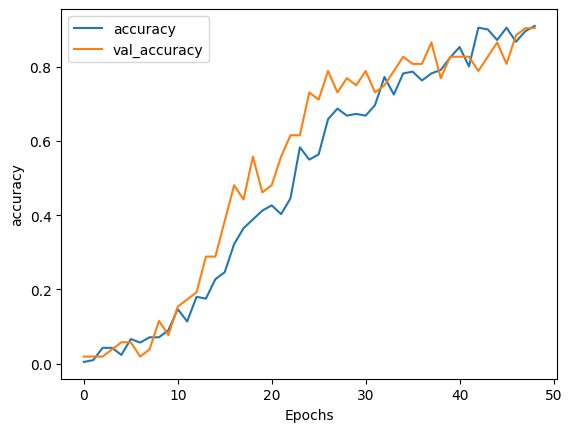

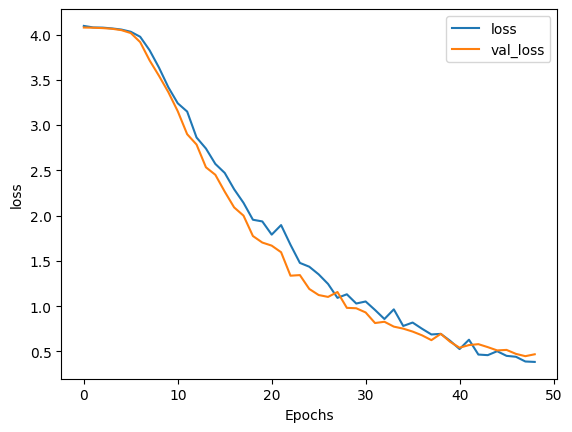

In [120]:
def plotGraphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plotGraphs(history, "accuracy")
plotGraphs(history, "loss")

In [121]:
def getResponse(predictTag, responses, confidence):
    if confidence < 0.4:
        return "Maaf, input yang Anda masukkan kurang jelas."
    return np.random.choice(responses[predictTag])

In [122]:
def showRespon(input):
    inputA = vectorizer([input])
    prediction = modelPhychan.predict(inputA)

    predictClassIndex = np.argmax(prediction, axis=-1)
    confidence = prediction[0][predictClassIndex[0]]
    predictTag = labelEncoder.get_vocabulary()[predictClassIndex[0]]
    response = getResponse(predictTag, responses, confidence)

    return predictTag, response, confidence


In [123]:
testInput = "saya merasa demam"

predictTag, response, confidence = showRespon(testInput)

print(f"Predicted tag: {predictTag}")
print(f"Confidence: {confidence:.2f}")
print(f"Response: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Predicted tag: Demam
Confidence: 0.86
Response: Untuk mengobati demam di rumah: 1) Minum banyak cairan agar tetap terhidrasi. 2) Kenakan pakaian yang tipis. 3) Gunakan selimut tipis jika Anda merasa kedinginan, hingga rasa dinginnya hilang. 4) Minum asetaminofen (Tylenol, dan lain-lain) atau ibuprofen (Advil, Motrin IB, dan lain-lain). 5) Cari pertolongan medis jika demam berlangsung lebih dari lima hari berturut-turut.


In [126]:
modelPhychan.save('./model/chatbot_model.h5',history)